# Binäre Klassifikation - Analyse
Die bisherigen Ergebnisse sind nicht so gut.
Was lief nicht so gut? Was kann verbessert werden?
Dazu werden die Daten genauer angesehen:
- Gibt es starke Ausreißer, welche die Ergebnisse beeinflusst haben?
- Gibt es fehlende Daten in den Datensätzen?
- Haben die Werte der Daten teilweise AUslenkungen von mehrern Größenordnungen?
- Sind die Daten extrem nicht-ausgeglichen?

Der letzte Punkt ist bei den Daten der habitablen Planten vorhanden.
Nur etwa 1% der Datensätze wird als habitabel angesehen.

Wie reagieren die Algorithmen auf diese Extreme. 
Auch wenn noch nicht so viele verschiedene Algorithmen bekannt sind, 
ist es wichtig sich mit diesen Fargestellungen auseinanderzusetzen.
EInige der Punkte werden wieder anhand der habitablen Planeten betrachtet.

### Import wichtiger Python-Module

In [1]:
# --- imports
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn import metrics 

from tools import show_confusion_matrix_extended

## 1 Daten für habitable Planeten
Die Daten für die habitablen Planeten werden wieder eingelesen, damit sie für die Bearbeitung
zur Verfügung stehen. 
Die aufbereiteten Daten stehen als `numpy`-Array zur Verfügung.

In der CSV-Datei sind fünf Spalten enthalten:
- die erste Spalte ist nur eine Durchnumerierung der Daten,
- `S_MASS` (Masse des Elternsterns in Sonnenmassen), 
- `P_PERIOD` (Umlaufzeit des Planeten in Tagen),
- `P_DISTANCE` (Entfernung des Planeten zum Elternstern in Astronomischen Einheiten (AU)) und
- `P_HABITABLE` (Kennzeichen, ob habitabel (1 habitabel, 0 nicht habitabel)).

Zuerst werden die Daten eingelesen

In [2]:
# --- read the data - complete
filename = 'HabitablePlanets_work.csv'
hwc = np.genfromtxt (filename, delimiter=',', \
                     usecols = (1, 2, 3, 4), skip_header = 1)
print (f"number of               exoplanets in the list : {hwc.shape [0]:5d}")

# -- split in features and label
hwc_features = hwc [:,0:3]
hwc_label = hwc[:,3]
unique, counts = np.unique (hwc_label, return_counts = True)
print (f"number of not habitable exoplanets in the list : {counts [0]:5d}")
print (f"number of     habitable exoplanets in the list : {counts [1]:5d}")

number of               exoplanets in the list :  5350
number of not habitable exoplanets in the list :  5280
number of     habitable exoplanets in the list :    70


Anschließend werden die Daten in Trainingsmenge und Testmenge aufgeteilt.

In [3]:
from sklearn.model_selection import train_test_split

# --- split in training set / test set
X_train, X_test, y_train, y_test \
    = train_test_split(hwc_features, hwc_label, random_state=2024)
print (f"Elements in the training set   : {X_train.shape [0]:5d}")
unique, counts = np.unique (y_train, return_counts = True)
print (f"  thereof habitable exoplanets : {counts [1]:5d}")
print (f"Elements in the test set       : {X_test.shape [0]:5d}")
unique, counts = np.unique (y_test, return_counts = True)
print (f"  thereof habitable exoplanets : {counts [1]:5d}")

Elements in the training set   :  4012
  thereof habitable exoplanets :    49
Elements in the test set       :  1338
  thereof habitable exoplanets :    21


### 2 Überttrainiert und untertrainiert
Bei den habitablen Planeten wurde in ML03a-Bewertung das Modell `DecisionTree` ohne Begrenzung trainiert.
Das Modell hat 14 Ebenen.
Das bedeutet, dass dieses Modell auf den Trainingsdaten eine 100%tige Genauigkeit hat. 
Bei den Testdaten ist die Genauigkeit jedoch deutlich geringer. Das bedeutet, dass das Model
**übertrainiert** (*overfitted*) ist. 

In [4]:
from sklearn.tree import DecisionTreeClassifier

# --- define model
DT_model = DecisionTreeClassifier (random_state=2024)
print (DT_model)

# --- fit (train)
DT_model.fit (X_train, y_train)

# --- predict
y_pred_train = DT_model.predict (X_train)
print (f"  accuracy (training set) : " \
       + f"{metrics.accuracy_score (y_train, y_pred_train):5.3f}")
y_pred = DT_model.predict (X_test)
print (f"  accuracy (test set)     : " \
       + f"{metrics.accuracy_score (y_test, y_pred):5.3f}")

print ()
show_confusion_matrix_extended (y_test, y_pred, labels = ["non hab", "hab"])

DecisionTreeClassifier(random_state=2024)
  accuracy (training set) : 1.000
  accuracy (test set)     : 0.987

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   1312 | FP=      5 |
  true label  -----------+------------+------------+
              hab        | FN=     12 | TP=      9 |
-------------------------+------------+------------+

    accuracy    = 0.9873
    precision   = 0.6429
    recall      = 0.4286
    FP-rate     = 0.0038
    TP-rate     = 0.4286
    F1-score    = 0.5143


Die Genauigkeit bei der Testmenge ist hoch. 
Das liegt jedoch daran, dass die Menge sehr unausgeglichen ist.
Es gibt nur wenige habitablen Planeten.
Die Präzision und die Trefferquote sind jedoch gering.
Das *faule Modell*, welches alle Planten als nicht habitabel kennzeichnet hat eine ähnlich
hohe Genauigkeit. Diese Modell ist jedoch **untertrainiert** (*underfitted*).
Genau genommen ist es überhaupt nicht trainiert.

Wie verändern sich die Kennzahlen, wenn die Tiefe beim Modell `DecisionTree` verändert wird.

Die Tiefen 1 und 2 werden nicht berachtet, denn im Entscheidungsbaum sind für diese beiden Ebenen 
noch alle Planeten nicht habitabel. Daher ist Präzision nicht definiert (Division durch 0). 

 depth  acc-tra  acc-tes  pre-tes  rec-tes
 -----  -------  -------  -------  -------
  14     1.0000   0.9873   0.6429   0.4286 
  13     0.9990   0.9851   0.5556   0.2381 
  12     0.9985   0.9843   0.5000   0.2381 
  11     0.9983   0.9843   0.5000   0.2381 
  10     0.9975   0.9865   0.5882   0.4762 
   9     0.9968   0.9851   0.5556   0.2381 
   8     0.9958   0.9858   0.6250   0.2381 
   7     0.9953   0.9865   0.7143   0.2381 
   6     0.9943   0.9865   0.7143   0.2381 
   5     0.9928   0.9873   0.8333   0.2381 
   4     0.9908   0.9858   0.7500   0.1429 
   3     0.9888   0.9865   0.8000   0.1905 
 -----------------------------------------


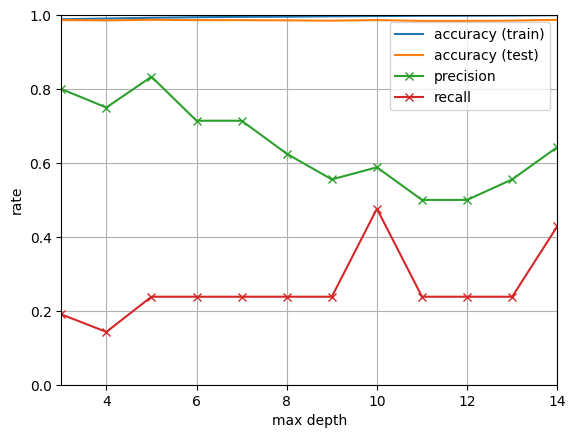

In [5]:
def do_decision_tree (max_depth, X_train, y_train, X_test, y_test, print_results = False):
    DT_model = DecisionTreeClassifier (random_state=2024, max_depth = max_depth)
    DT_model.fit (X_train, y_train)
    y_pred_train = DT_model.predict (X_train)
    accuracy_train = metrics.accuracy_score (y_train, y_pred_train)
    y_pred = DT_model.predict (X_test)
    accuracy_test = metrics.accuracy_score (y_test, y_pred)
    precision_test = metrics.precision_score (y_test, y_pred)
    recall_test = metrics.recall_score (y_test, y_pred)

    if print_results:
        print (f"  accuracy (training set) : " \
           + f"{metrics.accuracy_score (y_train, y_pred_train):5.3f}")
        print ()
        show_confusion_matrix_extended (y_test, y_pred, labels = ["non hab", "hab"])

    return max_depth, accuracy_train, accuracy_test, precision_test, recall_test

print (" depth  acc-tra  acc-tes  pre-tes  rec-tes")
print (" -----  -------  -------  -------  -------")
list_max_depth = range (14, 2, -1) 
list_of_results = []
for max_depth in list_max_depth:
    results = do_decision_tree (max_depth, X_train, y_train, X_test, y_test)
    list_of_results.append (results)
    print (f"  {max_depth:2d}   ", end = "")
    for i in range (len (results) - 1):
        print (f"  {results [i+1]:6.4f} ", end = "")
    print ()
print (" -----------------------------------------")

list_of_results = np.array (list_of_results)

plt.plot (list_of_results [:,0], list_of_results [:,1], label = "accuracy (train)")
plt.plot (list_of_results [:,0], list_of_results [:,2], label = "accuracy (test)")
plt.plot (list_of_results [:,0], list_of_results [:,3], 'x-', label = "precision")
plt.plot (list_of_results [:,0], list_of_results [:,4], 'x-', label = "recall")
plt.xlabel ("max depth")
plt.ylabel ("rate")
plt.ylim ([0.0, 1.0])
plt.xlim ([3.0,14.0])
plt.legend ()
plt.grid ()
plt.show ()

#### Welche Probleme können auftreten?

**Große Verzerrung**: 
Eine große Verzerrung, also ein große Diskrepanz zwischen vorhergesagten und tatsächlichem Ergebnis,
 deutet darauf hin, dass das Modell zu einfach ist (untertrainiert).
 Dies kann beispielsweise geschehen, wenn
 - ein lineares Modell für nicht-lineare Daten angewendet wird,
 - zu wenige Daten einbezogen werden oder
 - wenn die berücksichtigten Daten nicht relevant sind.

 **Große Varianz**: 
 Eine große Varianz, also eine große Streuung deutet darauf hin, dass nur die Trainingsmenge
 gut abgebildet wird, die Testmenge jedoch nicht (übertrainiert). Die Generalisierung der
 Modellierung klappt nicht gut.
 DIes kann beispielsweise auftreten, wenn
 - einfache Dinge zu komplex modelliert werden, 
   wobei Ecken und Kanten der Daten und auch Ausreißer mit modelliert werden 
   (10 Datenpunkte, die einen linearen Zusammenhang zeigen, mit Hilfe eines Polynoms 9.ten Grades exakt interpolieren) oder
 - zu viele nicht relevante Daten mit berücksichtigt werden (Untergrund, *noise*)

Egal ob über- oder untertrainiert, die Ergebnisse auf der Testmenge nicht schlecht.
Wann ist ein geeignetes Maß an Training erreicht?
Dazu können die Differenzen zwischen den Kennzahlen der Trainingsmenge und der Testmenge
betrachtet werden.
- Ist die Verzerrung bei Trainings- und Testmenge groß, dann ist das Modell schlecht trainiert,
  es ist untertrainiert. 
- Ist der Unterschied zwischen den Kennzahlen der Trainingsmenge und der Testmenge groß,
  dann modelliert das Modell die Trainingsdaten gut, jedoch nicht die Testdaten,
  das  Modell ist übertrainiert. 

Mit der Analyse bezüglich große Verzerrung, große Varianz ist noch keine Verbesserung verbunden.
Es ist nur eine Analyse der Probleme.


### 3 Untersuchung der Algorithmen
Die Kennzahlen für die Betrachtung der gesamten Menge der habitablen Planeten sind nicht so gut.
Welche Ursachen kann dies haben?
Dazu wird eine Untersuchung mit Hilfe der Kreuzvalidierung durchgeführt.
Es werden dabei nicht nur die Kennzahl Trefferquote für die Testmenge,
sondern auch für die Trainingsmenge ausgegeben. 
Es wird mit einer Zerlegung in $k = 10$ Teilen gearbeitet.

In [6]:
# --- imports
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict

# --- set parameters for all variants!
k_splits = 10
random_state = 2024

# --- routine to show distribution of data
def print_distribution (train, test, label):
    n_train_hab = np.sum (label [train])
    n_train_non = train.size - n_train_hab
    n_test_hab = np.sum (label [test])
    n_test_non = test.size - n_test_hab
    print (f" train: [{n_train_non:5.0f} - {n_train_hab:3.0f}]" + \
           f"   test: [{n_test_non:5.0f} - {n_test_hab:3.0f}]")

In [7]:
cv = KFold (shuffle = True, n_splits = k_splits, \
                random_state = random_state)

# -- show the distribution
for train, test in cv.split (hwc_features, hwc_label): 
    print_distribution (train, test, hwc_label)

# --- cross validation
scores = cross_validate (DT_model, hwc_features, hwc_label, cv = cv, \
                             scoring = 'recall', return_train_score = True)

print ("\nvalues for recall ")
print ("  test set     :", end = "")
for score in scores ['test_score']:
    print (f"  {score:6.4f}", end = "")
print ("")
print ("  training set :", end = "")
for score in scores ['train_score']:
    print (f"  {score:6.4f}", end = "")
print ("\n")

print (f"recall training set : {scores ['train_score'].mean ():5.3f} " \
       + f"+/- {scores ['train_score'].std () :5.3f}")

print (f"recall test set     : {scores ['test_score'].mean ():5.3f} " \
       + f"+/- {scores ['test_score'].std () :5.3f} \n")

# --- predict
y_pred = cross_val_predict (DT_model, hwc_features, hwc_label, cv = cv)

# --- display confusion matrix
show_confusion_matrix_extended (hwc_label, y_pred, labels = ["non hab", "hab"])

 train: [ 4756 -  59]   test: [  524 -  11]
 train: [ 4753 -  62]   test: [  527 -   8]
 train: [ 4748 -  67]   test: [  532 -   3]
 train: [ 4751 -  64]   test: [  529 -   6]
 train: [ 4754 -  61]   test: [  526 -   9]
 train: [ 4750 -  65]   test: [  530 -   5]
 train: [ 4749 -  66]   test: [  531 -   4]
 train: [ 4750 -  65]   test: [  530 -   5]
 train: [ 4754 -  61]   test: [  526 -   9]
 train: [ 4755 -  60]   test: [  525 -  10]

values for recall 
  test set     :  0.4545  0.5000  0.3333  0.8333  0.4444  0.8000  0.7500  0.4000  0.3333  0.4000
  training set :  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

recall training set : 1.000 +/- 0.000
recall test set     : 0.525 +/- 0.184 

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   5245 | FP=     35 |
  true label  -----------+------------+------------+
  

Da für den Entscheidungsbaum keine Restriktion in der Tiefe gegeben ist, 
ist das Ergebnis für die Trefferquote in der Trainingsmenge stets 100%.
Die Trefferquto in der Testmenge ist jedoch nur bei etwa 50%. 
Daher gibt es eine große Differenz zwischen den Kennzahlen zwischen Trainingsmenge und Testmenge.
Auf Grund der Standardabweichung ist der Unterschied signifikant.
Daher ist die Varianz hoch.

### 4 Lernkurve
Wie entwickeln sich die Kennzahlen, in Abhängigkeit der Größe der Trainingsmenge?
Dies ist eine wichtige Fragestellung.
Dazu wird eine **Lernkurve** (*learning curve*) erstellt.
Diese Lernkurve stellt grafisch dar, wie sich eine Kennzahl verändert,
wenn sich die Größe der Trainingsmenge ändern.

Mit `SHuffleSplit`wird die Aufteilung in Trainings- und Testmenge anhand von zufälligen Permutationen durchgeführt.

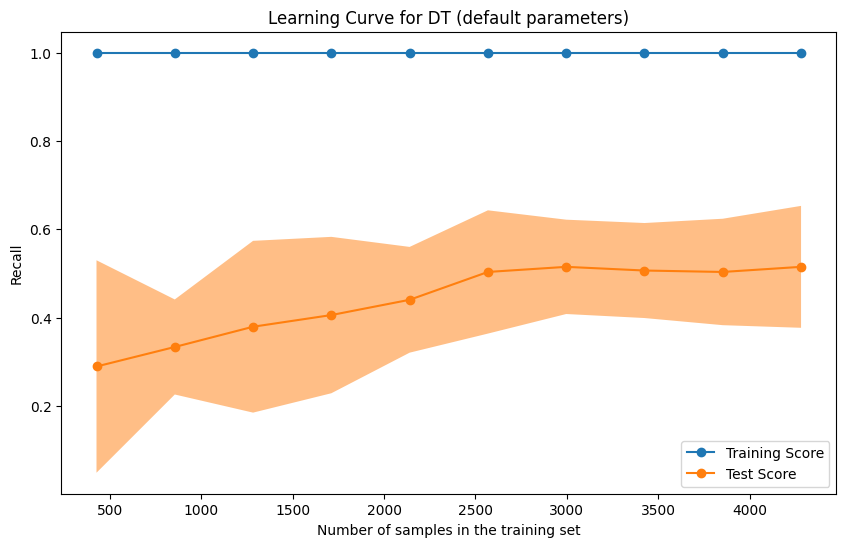

In [8]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)
common_params = {
    "X": hwc_features,
    "y": hwc_label,
    "train_sizes": np.linspace (0.1, 1.0, 10),
    "cv": ShuffleSplit (n_splits=10, test_size=0.2, random_state=2024),
    "scoring": "recall",
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Recall",
}

LearningCurveDisplay.from_estimator (DT_model, **common_params, ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend (handles[:2], ["Training Score", "Test Score"])
ax.set_title (f"Learning Curve for DT (default parameters)")
plt.show ()

In dem obigen Plot werden sind die Kennzahlen für die Testmenge und auch für die Trainingsmenge dargestellt.
Darher kann in dieser  Grafik sowohl die Verzerrung der Daten, als auch die Varianz betrachtet werden kann.
Daher kann auch abgeschätzt werden, ob mehr Daten hilfreich sind.

### 5 Verbesserungen
In den obigen Abschnitten sind einige Problempunkte aufgezeigt worden.
Es ergibt sich die Fragestellung, welche Möglichkeiten es gibt, die Ergebnisse zu verbessern.
DIesr Prozessschritt ist ein wichtiger Teil im Maschinellen Lernen.
Daher ist es ein iteratives Vorgehen, bis das Ergebnis zufriedenstellend ist.
Welche Möglichkeiten gint es?

#### 5.1 Anpassung der Hyperparameter
Die **Anpassung der Hyperparameter** (*hyperparameter tuning*) ist ein wichtige Vorgehensweise.
Die verschiedenen Modelle haben untershciedliche Hyperparameter.
Beim Modell *Entscheidungsbaum* (**DT**) ist ein wesentlicher Hyperparameter die Tiefe, bis zu der der Entscheidungsbaum erstellt wird.
Beim Modell *k-Nächster-Nachbarn* (**kNN**) ist die Anzahl der Nachbarn, die für den Vergleich herangezogen werden ein wesentlicher Hyperparameter.
Bei **kNN** kann jedoch statt der Anzahl der Nachbarn auch der Radius angegeben werden, in dem Nachbarn gesucht werden.
Es gibt weitere Hyperparameter für die Modelle, die in den jeweiligen Beschreibungen der Modelle nachgesehen werden können.

**Parameter / Hyperparameter**
Es ist wichtig zwischen Parameter und Hyperparameter zu unterscheiden.

Ein **Hyperparameter** (*hyperparameter*) ist eine Einstellung im Modell und somit eine Architekturfrage des Modells.
Ein Hyperparameter kann ein numerischer Wert sein (Tiefe beim Algorithmus DT) jedoch auch ein nicht-numerischer Wert
(typ vom Abstand bei kNN: Anzahl der Nachbarn oder Radius). 
Dabei kann es mehrere Hyperparameter geben, die in verschiedenen Variationen miteinander gemischt werden können.

Ein **Parameter** (*parameter*) ist ein numerischer Wert, der im Rahmen des Trainings gelernt wird.

Wenn aus Datenpunkten ein Polynom bestimmt werden soll, welches die Daten am besten nähert (das ist eine Regression, die später behandelt wird),
dann ist der Grad des Polynoms ein Hyperparameter.
Bei einem Neuronalen Netz (das auch später behandelt wird) die die Anzahl der verborgenen Schichten und die Anzahl der
Knoten in den jeweiligen Schichten Hyperparameter. Die Gewichte für die Verbindungen zwischen den Knoten sind die Parameter,
die beim Trainieren gelernt werden.

Auch die Optimierung der Hyperparameter kann wiederum ein Trainingsprozess sein.
Daher kann die Vorbereitung beim Maschinellen Lernen, also das Finden eines geeigneten Modells ein aufwändiger und
langwieriger Prozess sein. Ziel ist oftmals ein schnelles und zuverlässiges Modell zu finden. 
Zur Bedeutung von Hyperparametern, siehe auch [Pro2019].



#### 5.2 Gestaltung und Auswahl von Eigenschaften
Die Eigenschaften der Daten sind die Basisbausteine für das Maschinelle Lernen.
Mit diesen Eigenschaften werden die Prozesse gestaltet.
Bei der **Gesatltung von Eigenschaften** (*feature engineering*) und der **Auswahl von Eigenschaften** (*feature selection*)
werden diese Daten betrachtet. Daher ist es auch wichtig, dass diejenigen, welche die Prozesse gesatlten auch gute
fachliche Kenntnisse bezüglich der Daten haben. 

Wenn die Gesamtübersicht der habitablen Planeten (siehe JN03a-DatenAufbereiten) betrachtet wird,
dann ist zu erkennen, dass die Daten  in der zwei-dimensionalen Grafik schräg verlaufen.
Beim Algorithmus **DT** wird jedoch immer entlang der vorhandenen Achsen geteilt,
also horizontale oder vertikale Schnitte. 
Durch die Kombination von vorhandenen Eigenschaften kann eine neue Eigenschaft begildet werden.
Dieser Vorgang wird **Gesatltung von Eigenschaften** (*feature engineering*) genannt.
Bei den habitablen Planeten kann eine Kombination aus den Daten *Masse des Elternplaneten* und *Dauer eines Umlaufes*
eine neue Eigenschaft erstellen.
Diese neue Eigenschaft ist für den Algorithmus **DT** eventuell geeigneter gute Entscheidung beim Splitten zu treffen.
Personen mit einer guten fachlichen Expertise können solche Gestaltungen teilweise bereits im Vorfeld treffen
und somit den Prozess beschleunigen.

Ebenso ist es möglich Daten wegzulassen. 
Bei der **Auswahl von Eigenschaften** (*feature selection*) werde also bewusst Daten weggelassen und damit die Problemgröße reduziert.
Auch hier ist wieder die Herausforderung, die Daten zu kennen, also fachliches Wissen zu haben, um zu erkennen, welche Daten nicht relevant
sind, welche Daten somit ohne Probleme weggelassen werden können.

Dies ist ein Teil des ersten Prozessschrittes *vorbereiten / prepare*

#### 5.3 Algorithmus wechseln
Bei der Aufgabenstellung der habitablen Planeten wurden zwei verschiedene Algorithmen vorgestellt: **DT** und **kNN**.
Diese beiden Algorithmen brachten unterschiedliche Ergebnisse. 
Es gibt noch viele, sehr viele Algorithmen. 
Daher kann es eine Möglichkeit sein, den **Algortihmus wechseln** (*switching algorithm*)
Dann können die Ergebnisse der verschiedenen Algorithmen verglichen werden.
Dieser Teil gehört (zusammen mit der Anpassung der Hyperparameter) zum zweiten Prozessschritt (*auswählen / select*).
Hierzu ist es erforderlich, verschiedene Algorithmen und insbesondere auch die Einstellmöglichkeiten kennen zu lernen.

#### 5.4 Lernmenge neu zusamenstellen
Wenn die Lernmenge sehr unausgeglichen ist, wie beispielsweise bei den habitablen Planeten,
dann kann es hilfreich sein, die Lernmenge neu aufzustellen.
Aus der gegebenen Lernmenge werde mit einem Zufallsprozess Daten entnommen und in eine neue Lernmenge eingefügt.
Dabei ist die Wahrscheinlichkeit für die Auswahl eines Elementes mit der seltenen Eigenschaft höher als
für die Auswahl eine sElementes, welches häufig vorkommt.
Dieses Vorgehen wird **Resampling** (*resamplig*) genannt.

### 5.5 Mehr Daten
Eine wichtige Möglichkeit ist auch. mehr Daten zu verwenden.
Dies ist jedoch nicht immer einafch machbar.
Bei den habitablen Planeten können nicht einfach tausende von neuen Daten erzeugt werden.
Bei physikalischen Experimenten, wie am LHC, können jedoch durch weitere Versuchsläufe zusätzliche Daten erzeugt werden.
Daher ist es auch immer eine Frage, ob und wie neue, zusätzliche Daten erzeugt werden können.
Damit sielen auch Zeit- und Kostenfragen eine bedeutende Rolle (können die neuen Daten schnell genug gewonnen werden,
sind die Kosten für die Gewinnung der Daten vertretbar).

### Literatur
- [Acq2023] Viviana Acquaviva; Machine Learning for Physics and Astronomy; Princeton University Press; 2023
- [Pro2019] Philipp Probst, Anne-Laure Boulesteix and Bernd Bischl; Tunability: Importance of Hyperparameters of Machine
 Learning Algorithms; Journal of Machine Learning Research , 20 (53): 1 - 32; 2019